Plot the relation between s(min) and n. Hypothesis: s grows sublinearly (slower) than n 


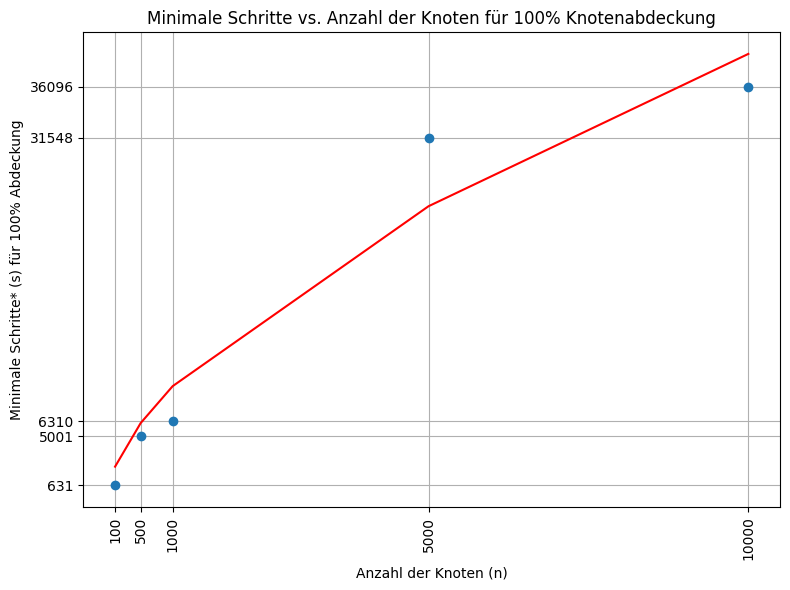

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Example data (replace with your actual data)
n_values = [100, 500, 1000, 5000, 10000]
s_min_values = [631, 5001, 6310, 31548, 36096]  # Corresponding values of s for 100% coverage

# Power-law fit function
def power_law_fit(x, A, B):
    return A * x**B

# Fit the data to a power-law curve
params, covariance = curve_fit(power_law_fit, n_values, s_min_values)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(n_values, s_min_values, 'o', label="Datenpunkte")
plt.plot(n_values, power_law_fit(np.array(n_values), *params), 'r-', label=f'Power-Law: A={params[0]:.2f}, B={params[1]:.2f}')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Minimum no. of steps* (s) für 100% node coverage')
plt.title('Minimum no. of steps vs. number of nodes für 100% node coverage')

# Set custom tick labels in linear scale for x and y
plt.xticks(ticks=[100, 500, 1000, 5000, 10000], labels=[100, 500, 1000, 5000, 10000])
plt.yticks(ticks=[631, 5001, 6310, 31548, 36096], labels=[631, 5001, 6310, 31548, 36096])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()



Plot the relation between s(min) and p - nothing interesting 

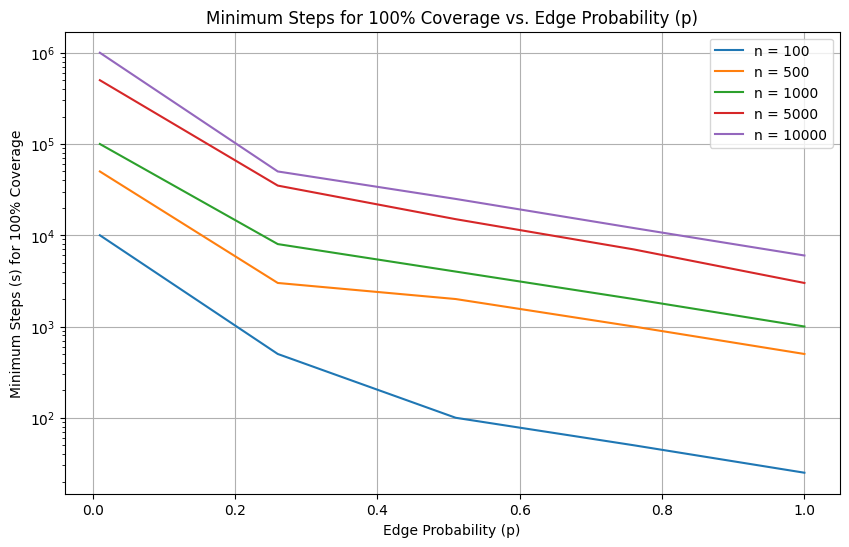

In [7]:
# Example data for different n values and their corresponding s_min at various p values
n_values = [100, 500, 1000, 5000, 10000]
p_values = [0.01, 0.26, 0.51, 0.76, 1.0]
s_min_for_p = {
    100: [10000, 500, 100, 50, 25], 
    500: [50000, 3000, 2000, 1000, 500],
    1000: [100000, 8000, 4000, 2000, 1000],
    5000: [500000, 35000, 15000, 7000, 3000],
    10000: [1000000, 50000, 25000, 12000, 6000]
}

# Plotting for various n
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_values, s_min_for_p[n], label=f'n = {n}')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Edge Probability (p)')
plt.ylabel('Minimum Steps (s) for 100% Coverage')
plt.title('Minimum Steps for 100% Coverage vs. Edge Probability (p)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Import the necessary functions from your original script
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import choice
from scipy.stats import spearmanr
from matplotlib.ticker import FuncFormatter
from random_walk_lengths import connected_graph_with_n_p, random_walk


# Modify the function to run each random walk 10 times and calculate the average
def try_different_n_p_statics_with_avg():
    # Set the parameters
    n_values = [100, 500, 1000]  # List of n values for the experiment
    p_values = [0.25]  # Threshold probability p = 0.25

    # Define s_formula to be s = n * 10
    s_formula = lambda n: [n * 10]  # Make sure s is exactly 10 times the value of n

    results = []
    
    for n in n_values:
        for p in p_values:
            graph = connected_graph_with_n_p(n, p)
            
            s_values = s_formula(n)
            
            # For each combination of n, p, s, run the random walk multiple times
            for s in s_values:
                visited_percent_list = []  # List to store the visited percent for each walk
                
                # Run the random walk `num_walks` times
                for _ in range(10):
                    visits = random_walk(graph, s)
                    
                    # Calculate the visited nodes percentage
                    visited_only = [value for key, value in visits.items() if value > 0]
                    visited_count = len(visited_only)
                    visited_percent = visited_count / n  # Percentage of nodes visited
                    
                    visited_percent_list.append(visited_percent)
                
                # Calculate the average visited percentage for the `num_walks`
                avg_visited_percent = np.mean(visited_percent_list)
                
                results.append({
                    'n': n,
                    'p': p,
                    's': s,
                    'avg_visited_percent': avg_visited_percent,
                })
                # Print the results for each combination of parameters
                print(f"n: {n}, p: {p}, s: {s} -> Avg %: {avg_visited_percent:.2f}")
    
    return results

# Run the experiment with the specified parameters
results_with_avg = try_different_n_p_statics_with_avg()

# Print the results as a list
print("\nResults (Average Node Coverage for each combination of n, p, and s):")
for result in results_with_avg:
    print(result)



Attempting to generate a connected graph with 100 nodes and p = 0.01
Attempt 1: Disconnected graph. Trying again...
Attempt 2: Disconnected graph. Trying again...
Attempt 3: Disconnected graph. Trying again...
Attempt 4: Disconnected graph. Trying again...
Attempt 5: Disconnected graph. Trying again...
Attempt 6: Disconnected graph. Trying again...
Attempt 7: Disconnected graph. Trying again...
Attempt 8: Disconnected graph. Trying again...
Attempt 9: Disconnected graph. Trying again...
Attempt 10: Disconnected graph. Trying again...
Attempt 11: Disconnected graph. Trying again...
Attempt 12: Disconnected graph. Trying again...
Attempt 13: Disconnected graph. Trying again...
Attempt 14: Disconnected graph. Trying again...
Attempt 15: Disconnected graph. Trying again...
Attempt 16: Disconnected graph. Trying again...
Attempt 17: Disconnected graph. Trying again...
Attempt 18: Disconnected graph. Trying again...
Attempt 19: Disconnected graph. Trying again...
Attempt 20: Disconnected gra

KeyboardInterrupt: 